# Imports

In [ ]:
import os
import shutil

import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import kagglehub


# Downloading data from Kaggle
https://www.kaggle.com/datasets/marcozuppelli/stegoimagesdataset

KAGGLE_KEY

KAGGLE_USERNAME

In [ ]:
path = kagglehub.dataset_download("marcozuppelli/stegoimagesdataset")

print("Path to dataset files:", path)



source_path = path
destination_path = '/content/'

if not os.path.exists(destination_path):
    os.makedirs(destination_path)

shutil.move(source_path, destination_path)

print(f"Data moved from {source_path} to {destination_path}")


100%|██████████| 1.51G/1.51G [00:19<00:00, 82.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/marcozuppelli/stegoimagesdataset/versions/2
Data moved from /root/.cache/kagglehub/datasets/marcozuppelli/stegoimagesdataset/versions/2 to /content/


# Analyzing Data Files and Segregating Data into New Classes

In [ ]:
main_file= "2/"
folders= ["train/train", "test/test", "val/val"]
classes = ["clean", "stego"]

In [ ]:
train_stego_imgs = os.listdir("/content/2/train/train/stego")

In [ ]:
train_stego_imgs[0]

'image_01627_ps_0.png'

In [ ]:
train_stego_imgs[4].split("_")[2]

'eth'

In [ ]:
def dataset_with_new_classes(sub_set_path, new_path):
  all_clases = set()
  sub_set_images = os.listdir(sub_set_path)
  os.makedirs(new_path, exist_ok=True)
  for img in sub_set_images:
    img_clas = img.split("_")[2]
    all_clases.add(img_clas)
    os.makedirs(os.path.join(new_path, img_clas), exist_ok=True)

    source_path =  os.path.join(sub_set_path,img)
    destination_path =  os.path.join(new_path, img_clas,img)

    shutil.copy(source_path, destination_path)
  print(all_clases)


In [ ]:
dataset_with_new_classes("/content/2/train/train/stego", "new_data/train")

{'html', 'ps', 'js', 'url', 'eth'}


In [ ]:
dataset_with_new_classes("/content/2/test/test/stego", "new_data/test")

{'html', 'ps', 'js', 'url', 'eth'}


In [ ]:
dataset_with_new_classes("/content/2/val/val/stego", "new_data/val")

{'html', 'ps', 'js', 'url', 'eth'}


In [ ]:
shutil.copytree("/content/2/train/train/clean", "new_data/train/clean")

'new_data/train/clean'

In [ ]:
shutil.copytree("/content/2/test/test/clean", "new_data/test/clean")

'new_data/test/clean'

In [ ]:
shutil.copytree("/content/2/val/val/clean", "new_data/val/clean")

'new_data/val/clean'

In [ ]:
for i in os.listdir("new_data/train"):
  print(f"{i}: {len(os.listdir(f'new_data/train/{i}'))}")

eth: 2473
ps: 2468
js: 2363
clean: 4000
url: 2412
html: 2284


In [ ]:
for i in os.listdir("new_data/test"):
  print(f"{i}: {len(os.listdir(f'new_data/test/{i}'))}")

eth: 1247
ps: 1164
js: 1188
clean: 2000
url: 1234
html: 1167


In [ ]:
for i in os.listdir("new_data/val"):
  print(f"{i}: {len(os.listdir(f'new_data/val/{i}'))}")

eth: 1193
ps: 1213
js: 1214
clean: 2000
url: 1218
html: 1162


# Data Splitting

In [ ]:
train_folder = "new_data/train"
test_folder = "new_data/test"
val_folder = "new_data/val"

combined_folder = "new_data_combined"

os.makedirs(combined_folder, exist_ok=True)

def combine_data(src_folder, dst_folder):
    for class_name in os.listdir(src_folder):
        class_folder = os.path.join(src_folder, class_name)
        if os.path.isdir(class_folder):
            combined_class_folder = os.path.join(dst_folder, class_name)
            os.makedirs(combined_class_folder, exist_ok=True)
            for fil in os.listdir(class_folder):
                src_file = os.path.join(class_folder, fil)
                shutil.copy(src_file, combined_class_folder)

combine_data(train_folder, combined_folder)
combine_data(test_folder, combined_folder)
combine_data(val_folder, combined_folder)


def move_imgs(file_list, dst_folder, class_name):
    class_folder = os.path.join(dst_folder, class_name)
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)
    for file in file_list:
        shutil.move(file, class_folder)



def resplit_data(combined_folder, new_train_folder, new_test_folder, new_val_folder, train_ratio, test_ratio, val_ratio):
    for class_name in os.listdir(combined_folder):
        class_folder = os.path.join(combined_folder, class_name)
        all_imgs = [os.path.join(class_folder, f) for f in os.listdir(class_folder)]

        train_imgs, temp_imgs = train_test_split(all_imgs, test_size=(1 - train_ratio))
        val_imgs, test_imgs = train_test_split(temp_imgs, test_size=(test_ratio / (test_ratio + val_ratio)))


        move_imgs(train_imgs, new_train_folder, class_name)
        move_imgs(test_imgs, new_test_folder, class_name)
        move_imgs(val_imgs, new_val_folder, class_name)

train_ratio = 0.8
test_ratio = 0.1
val_ratio = 0.1

new_train_folder = "final_payload_data/train"
new_test_folder = "final_payload_data/test"
new_val_folder = "final_payload_data/val"

os.makedirs(new_train_folder, exist_ok=True)
os.makedirs(new_test_folder, exist_ok=True)
os.makedirs(new_val_folder, exist_ok=True)

resplit_data(combined_folder, new_train_folder, new_test_folder, new_val_folder, train_ratio, test_ratio, val_ratio)

print("Data re-split completed successfully!")

Data re-split completed successfully!


In [ ]:
os.listdir("/content/final_payload_data/train/clean")[0]

'00491.png'

In [ ]:

width, height =  Image.open("/content/final_payload_data/train/clean/00491.png").size

print(f"Image size: {width} x {height}")


Image size: 512 x 512


# Loading Data within Tesorflow Datasets

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "final_payload_data/train",
    labels='inferred',
    label_mode='int', # clean:0, html:1, ps:2 ...
    batch_size=32,
    image_size=(512, 512),
    shuffle=True,
    seed=123
)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "final_payload_data/val",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(512, 512),
    shuffle=True,
    seed=123
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "final_payload_data/test",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(512, 512),
    shuffle=False,
)



Found 25599 files belonging to 6 classes.
Found 3198 files belonging to 6 classes.
Found 3203 files belonging to 6 classes.


In [ ]:
### After expermenting with and without scaling, we notice that scaling can effect how the model detect the payload in a bad way
### therefore, we will skip this step

# rescale = tf.keras.layers.Rescaling(1./255)


# train_dataset = train_dataset.map(lambda x, y: (rescale(x), y))
# val_dataset = val_dataset.map(lambda x, y: (rescale(x), y))
# test_dataset = test_dataset.map(lambda x, y: (rescale(x), y))


In [ ]:
for images, labels in train_dataset.take(1):
    print("Train image batch shape:", images.shape)
    print("Train label batch shape:", labels.shape)

print("-" *50 )
for images, labels in val_dataset.take(1):
    print("Validation image batch shape:", images.shape)
    print("Validation label batch shape:", labels.shape)
print("-" *50 )
for images, labels in test_dataset.take(1):
    print("Test image batch shape:", images.shape)
    print("Test label batch shape:", labels.shape)


Train image batch shape: (32, 512, 512, 3)
Train label batch shape: (32,)
--------------------------------------------------
Validation image batch shape: (32, 512, 512, 3)
Validation label batch shape: (32,)
--------------------------------------------------
Test image batch shape: (32, 512, 512, 3)
Test label batch shape: (32,)


# Model Building and Training

In [ ]:
input_shape = (512, 512, 3)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),


    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 510, 510, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 255, 255, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 253, 253, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 124, 124, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 60, 60, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,414,182 (13.02 MB)

 Trainable params: 3,414,182 (13.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,
    verbose=True
)


Epoch 1/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 185s 226ms/step - accuracy: 0.2582 - loss: 2.3232 - val_accuracy: 0.6923 - val_loss: 0.6752
Epoch 2/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 195s 220ms/step - accuracy: 0.7086 - loss: 0.6440 - val_accuracy: 0.8915 - val_loss: 0.3547
Epoch 3/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 202s 219ms/step - accuracy: 0.8461 - loss: 0.3932 - val_accuracy: 0.9134 - val_loss: 0.2708
Epoch 4/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 202s 219ms/step - accuracy: 0.8928 - loss: 0.3296 - val_accuracy: 0.9131 - val_loss: 0.2611
Epoch 5/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 204s 221ms/step - accuracy: 0.8969 - loss: 0.3108 - val_accuracy: 0.9190 - val_loss: 0.2546


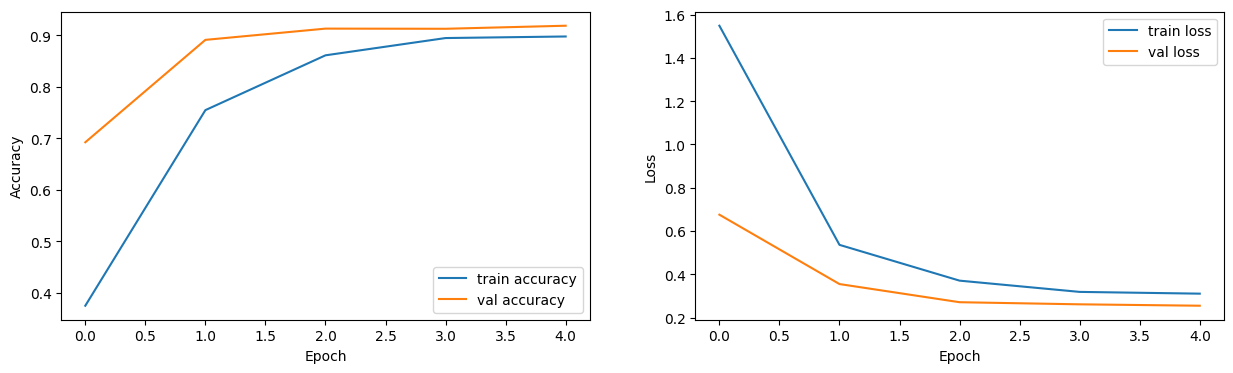

In [ ]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Model Evaluating

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")


101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.9698 - loss: 0.1318
Test accuracy: 0.9138307571411133


In [ ]:
class_names = train_dataset.class_names
print("Class Names and their Encodings:")
for i, class_name in enumerate(class_names):
    print(f"Encoding {i}: {class_name}")

Class Names and their Encodings:
Encoding 0: clean
Encoding 1: eth
Encoding 2: html
Encoding 3: js
Encoding 4: ps
Encoding 5: url


In [ ]:
y_true = []
y_pred = []

for images, labels in train_dataset:
    predictions = model.predict(images, verbose=False)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))


Classification Report:
              precision    recall  f1-score   support

       clean       1.00      1.00      1.00      6400
         eth       0.79      1.00      0.88      3930
        html       0.94      0.89      0.91      3690
          js       0.89      0.87      0.88      3812
          ps       0.92      0.99      0.95      3876
         url       1.00      0.72      0.84      3891

    accuracy                           0.92     25599
   macro avg       0.92      0.91      0.91     25599
weighted avg       0.93      0.92      0.92     25599



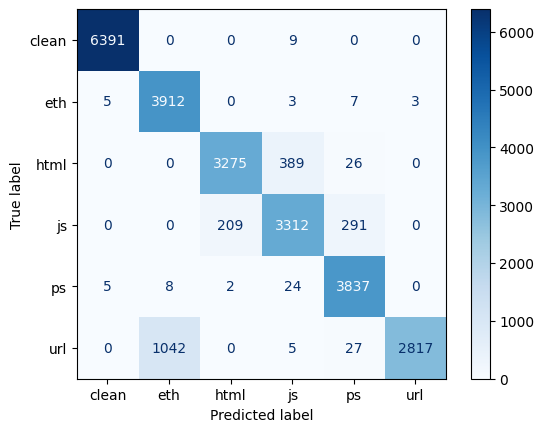

In [ ]:
class_names = train_dataset.class_names

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

conf_matrix = confusion_matrix(y_true, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()



In [ ]:
y_true = []
y_pred = []

for images, labels in val_dataset:
    predictions = model.predict(images, verbose=False)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))


Classification Report:
              precision    recall  f1-score   support

       clean       1.00      1.00      1.00       800
         eth       0.79      0.99      0.88       491
        html       0.94      0.89      0.91       461
          js       0.88      0.87      0.88       476
          ps       0.93      0.99      0.95       484
         url       0.99      0.73      0.84       486

    accuracy                           0.92      3198
   macro avg       0.92      0.91      0.91      3198
weighted avg       0.93      0.92      0.92      3198



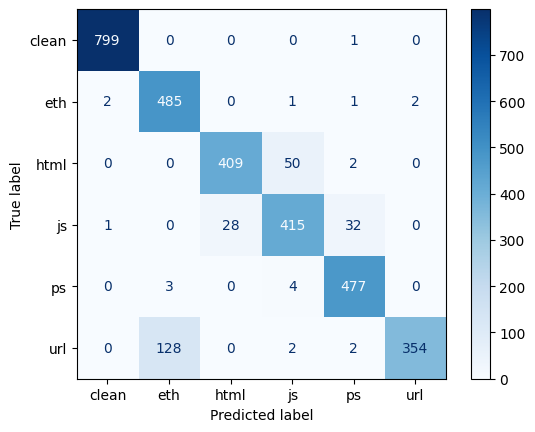

In [ ]:
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

conf_matrix = confusion_matrix(y_true, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
y_true = []
y_pred = []

for images, labels in test_dataset:
    predictions = model.predict(images, verbose=False)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))


Classification Report:
              precision    recall  f1-score   support

       clean       1.00      1.00      1.00       800
         eth       0.77      1.00      0.87       492
        html       0.93      0.88      0.91       462
          js       0.88      0.86      0.87       477
          ps       0.92      0.99      0.95       485
         url       0.99      0.70      0.82       487

    accuracy                           0.91      3203
   macro avg       0.92      0.90      0.90      3203
weighted avg       0.92      0.91      0.91      3203



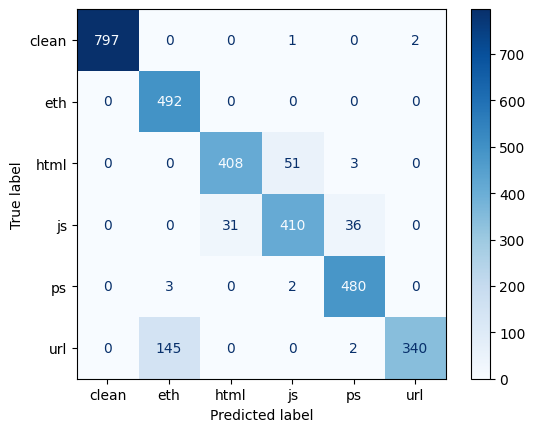

In [ ]:
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

conf_matrix = confusion_matrix(y_true, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()
